## Previsões do modelo

Para ilustrar a funcionalidade do modelo, podemos olhar para algumas previsões.

In [19]:
import keras
import numpy as np
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

data_dir = pathlib.Path("data").with_suffix("")

In [2]:
model = keras.saving.load_model("models/omr_model.keras")

Pegaremos 6 observações aleatórias do conjunto de teste e compararemos as previsões do modelo com os valores reais.	

TODO: pegar os dados do ds_test.

In [17]:
n = 6

images = {}
predictions = {}
for label in ["confirmed", "empty", "crossedout"]:
    images[label] = []
    list_ds = tf.data.Dataset.list_files(str(data_dir / f"{label}/*"), shuffle=False)
    for f in list_ds.shuffle(list_ds.cardinality()).take(n):
        image = keras.utils.load_img(f.numpy(), target_size=(71, 71))
        image = np.array(image)
        images[label].append(image)
    images[label] = np.stack(images[label], axis=0)
    predictions[label] = model.predict(images[label], verbose=False, batch_size=n)

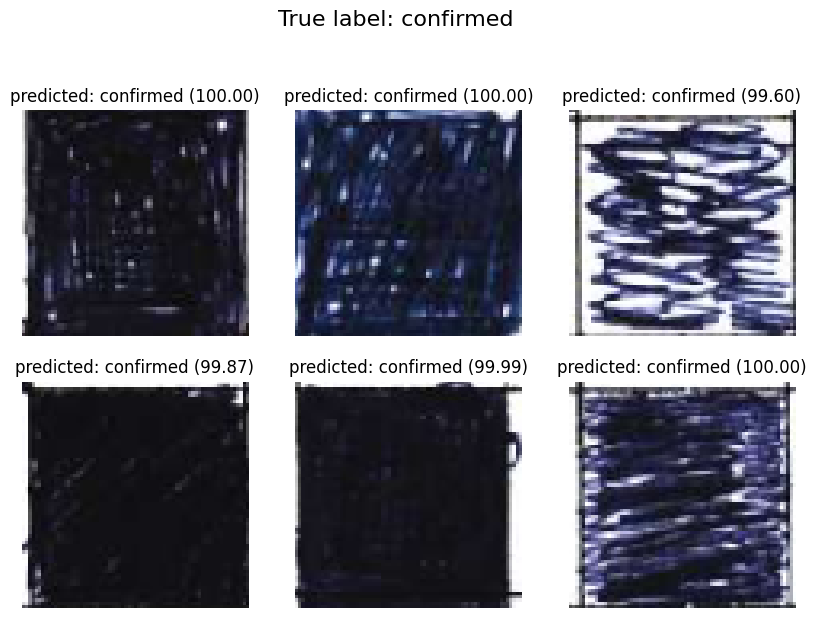

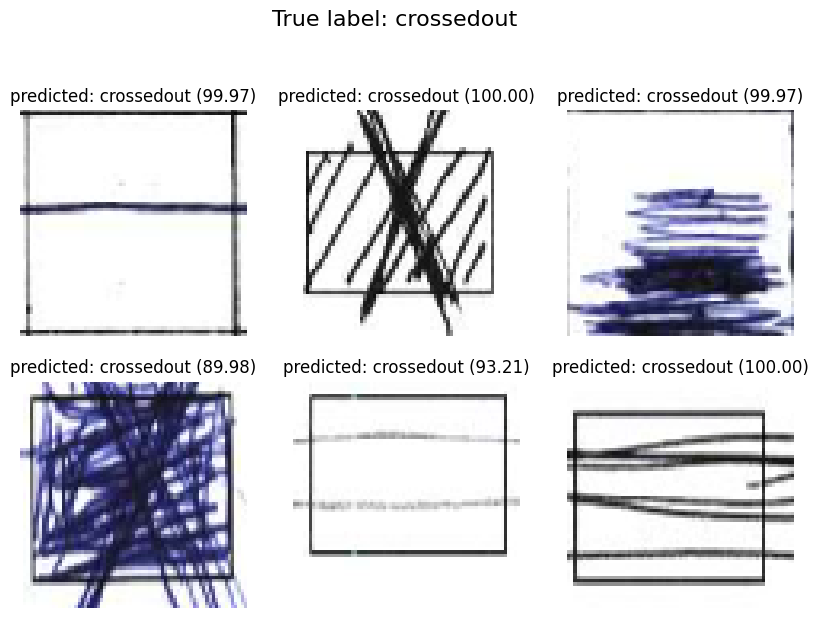

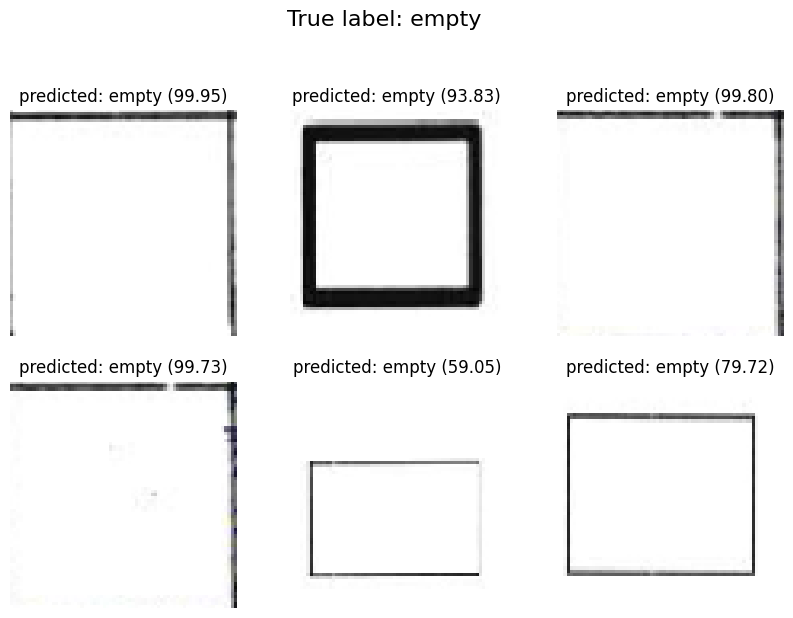

In [30]:
class_names = ["confirmed", "crossedout", "empty"]

for true_label in class_names:
    image_batch = images[true_label]
    prediction_batch = predictions[true_label]
    label_batch = np.argmax(prediction_batch, axis=1)
    probability_batch = np.max(prediction_batch, axis=1)

    plt.figure(figsize=(10, 10))
    plt.suptitle("True label: " + true_label, fontsize=16)
    for i in range(len(image_batch)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].astype("uint8"))
        label = label_batch[i]
        ax.set_title(f"predicted: {class_names[label]} ({(probability_batch[i] * 100):.2f})")
        plt.axis("off")
    plt.show()